In [1]:
!nvidia-smi

Fri Aug 23 16:59:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   46C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 33.7/201.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 22.8M/22.8M [00:00<00:00, 39.9MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

100% 104k/104k [00:00<00:00, 67.9MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 188.1ms
Speed: 13.7ms preprocess, 188.1ms inference, 874.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


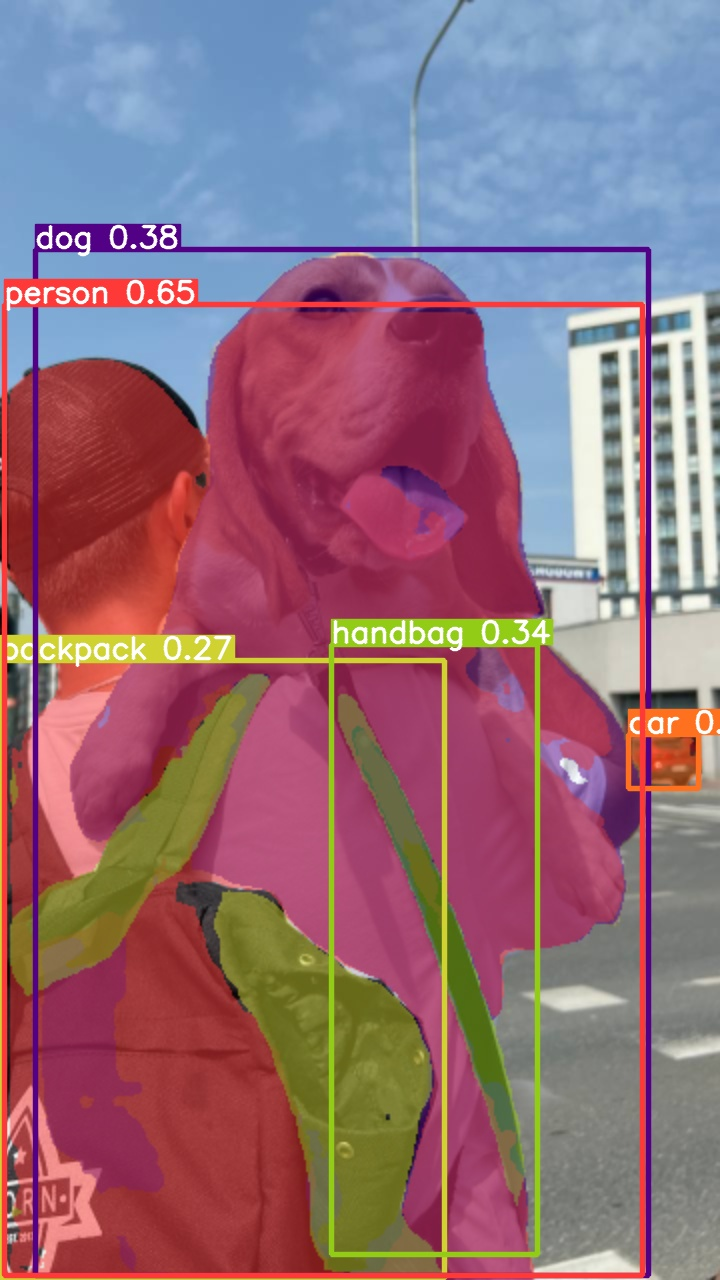

In [6]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

In [7]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 199.6ms
Speed: 4.2ms preprocess, 199.6ms inference, 620.4ms postprocess per image at shape (1, 3, 640, 384)


In [8]:
results[0].boxes.xyxy

tensor([[4.4420e+00, 3.0429e+02, 6.4260e+02, 1.2755e+03],
        [6.2834e+02, 7.3451e+02, 6.9820e+02, 7.8832e+02],
        [3.5400e+01, 2.4989e+02, 6.4883e+02, 1.2759e+03],
        [3.3153e+02, 6.4432e+02, 5.3794e+02, 1.2545e+03],
        [8.9011e-01, 6.6047e+02, 4.4417e+02, 1.2785e+03]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.6483, 0.5236, 0.3803, 0.3438, 0.2663], device='cuda:0')

In [9]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [11]:
results[0].masks.xyn

[array([[    0.36111,     0.24375],
        [    0.35833,     0.24531],
        [    0.34444,     0.24531],
        ...,
        [    0.65833,     0.24531],
        [    0.64722,     0.24531],
        [    0.64444,     0.24375]], dtype=float32),
 array([[    0.88056,       0.575],
        [    0.87778,     0.57656],
        [    0.87778,     0.59219],
        [    0.88056,     0.59375],
        [    0.88056,     0.59531],
        [    0.88611,     0.59844],
        [    0.88611,         0.6],
        [    0.88889,     0.60156],
        [    0.88889,     0.60625],
        [    0.89167,     0.60781],
        [    0.89167,     0.60938],
        [    0.89444,     0.61094],
        [    0.92778,     0.61094],
        [    0.93056,      0.6125],
        [    0.93333,      0.6125],
        [    0.93611,     0.61406],
        [       0.95,     0.61406],
        [    0.95278,      0.6125],
        [    0.95278,     0.61094],
        [    0.96667,     0.60312],
        [    0.96944,     0.60312]

In [12]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="Ty6H3vhtJnhjj9X8aCff")
project = rf.workspace("ai-flooring-model-mid").project("walls-segmentation-detection")
dataset = project.version(8).download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to Walls-Segmentation-(Detection)-8 in yolov8:: 100%|██████████| 1419/1419 [00:00<00:00, 8001.37it/s]


In [14]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data="{dataset.location}/data.yaml" epochs=100 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.2.81 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Walls-Segmentation-(Detection)-8/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, li

In [15]:
!ls {HOME}/runs/segment/train/

args.yaml					    labels.jpg	      train_batch2.jpg
BoxF1_curve.png					    MaskF1_curve.png  train_batch3690.jpg
BoxP_curve.png					    MaskP_curve.png   train_batch3691.jpg
BoxPR_curve.png					    MaskPR_curve.png  train_batch3692.jpg
BoxR_curve.png					    MaskR_curve.png   val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv       val_batch0_pred.jpg
confusion_matrix.png				    results.png       val_batch1_labels.jpg
events.out.tfevents.1724432556.9bcc939b5e37.2394.0  train_batch0.jpg  val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg  weights


/content


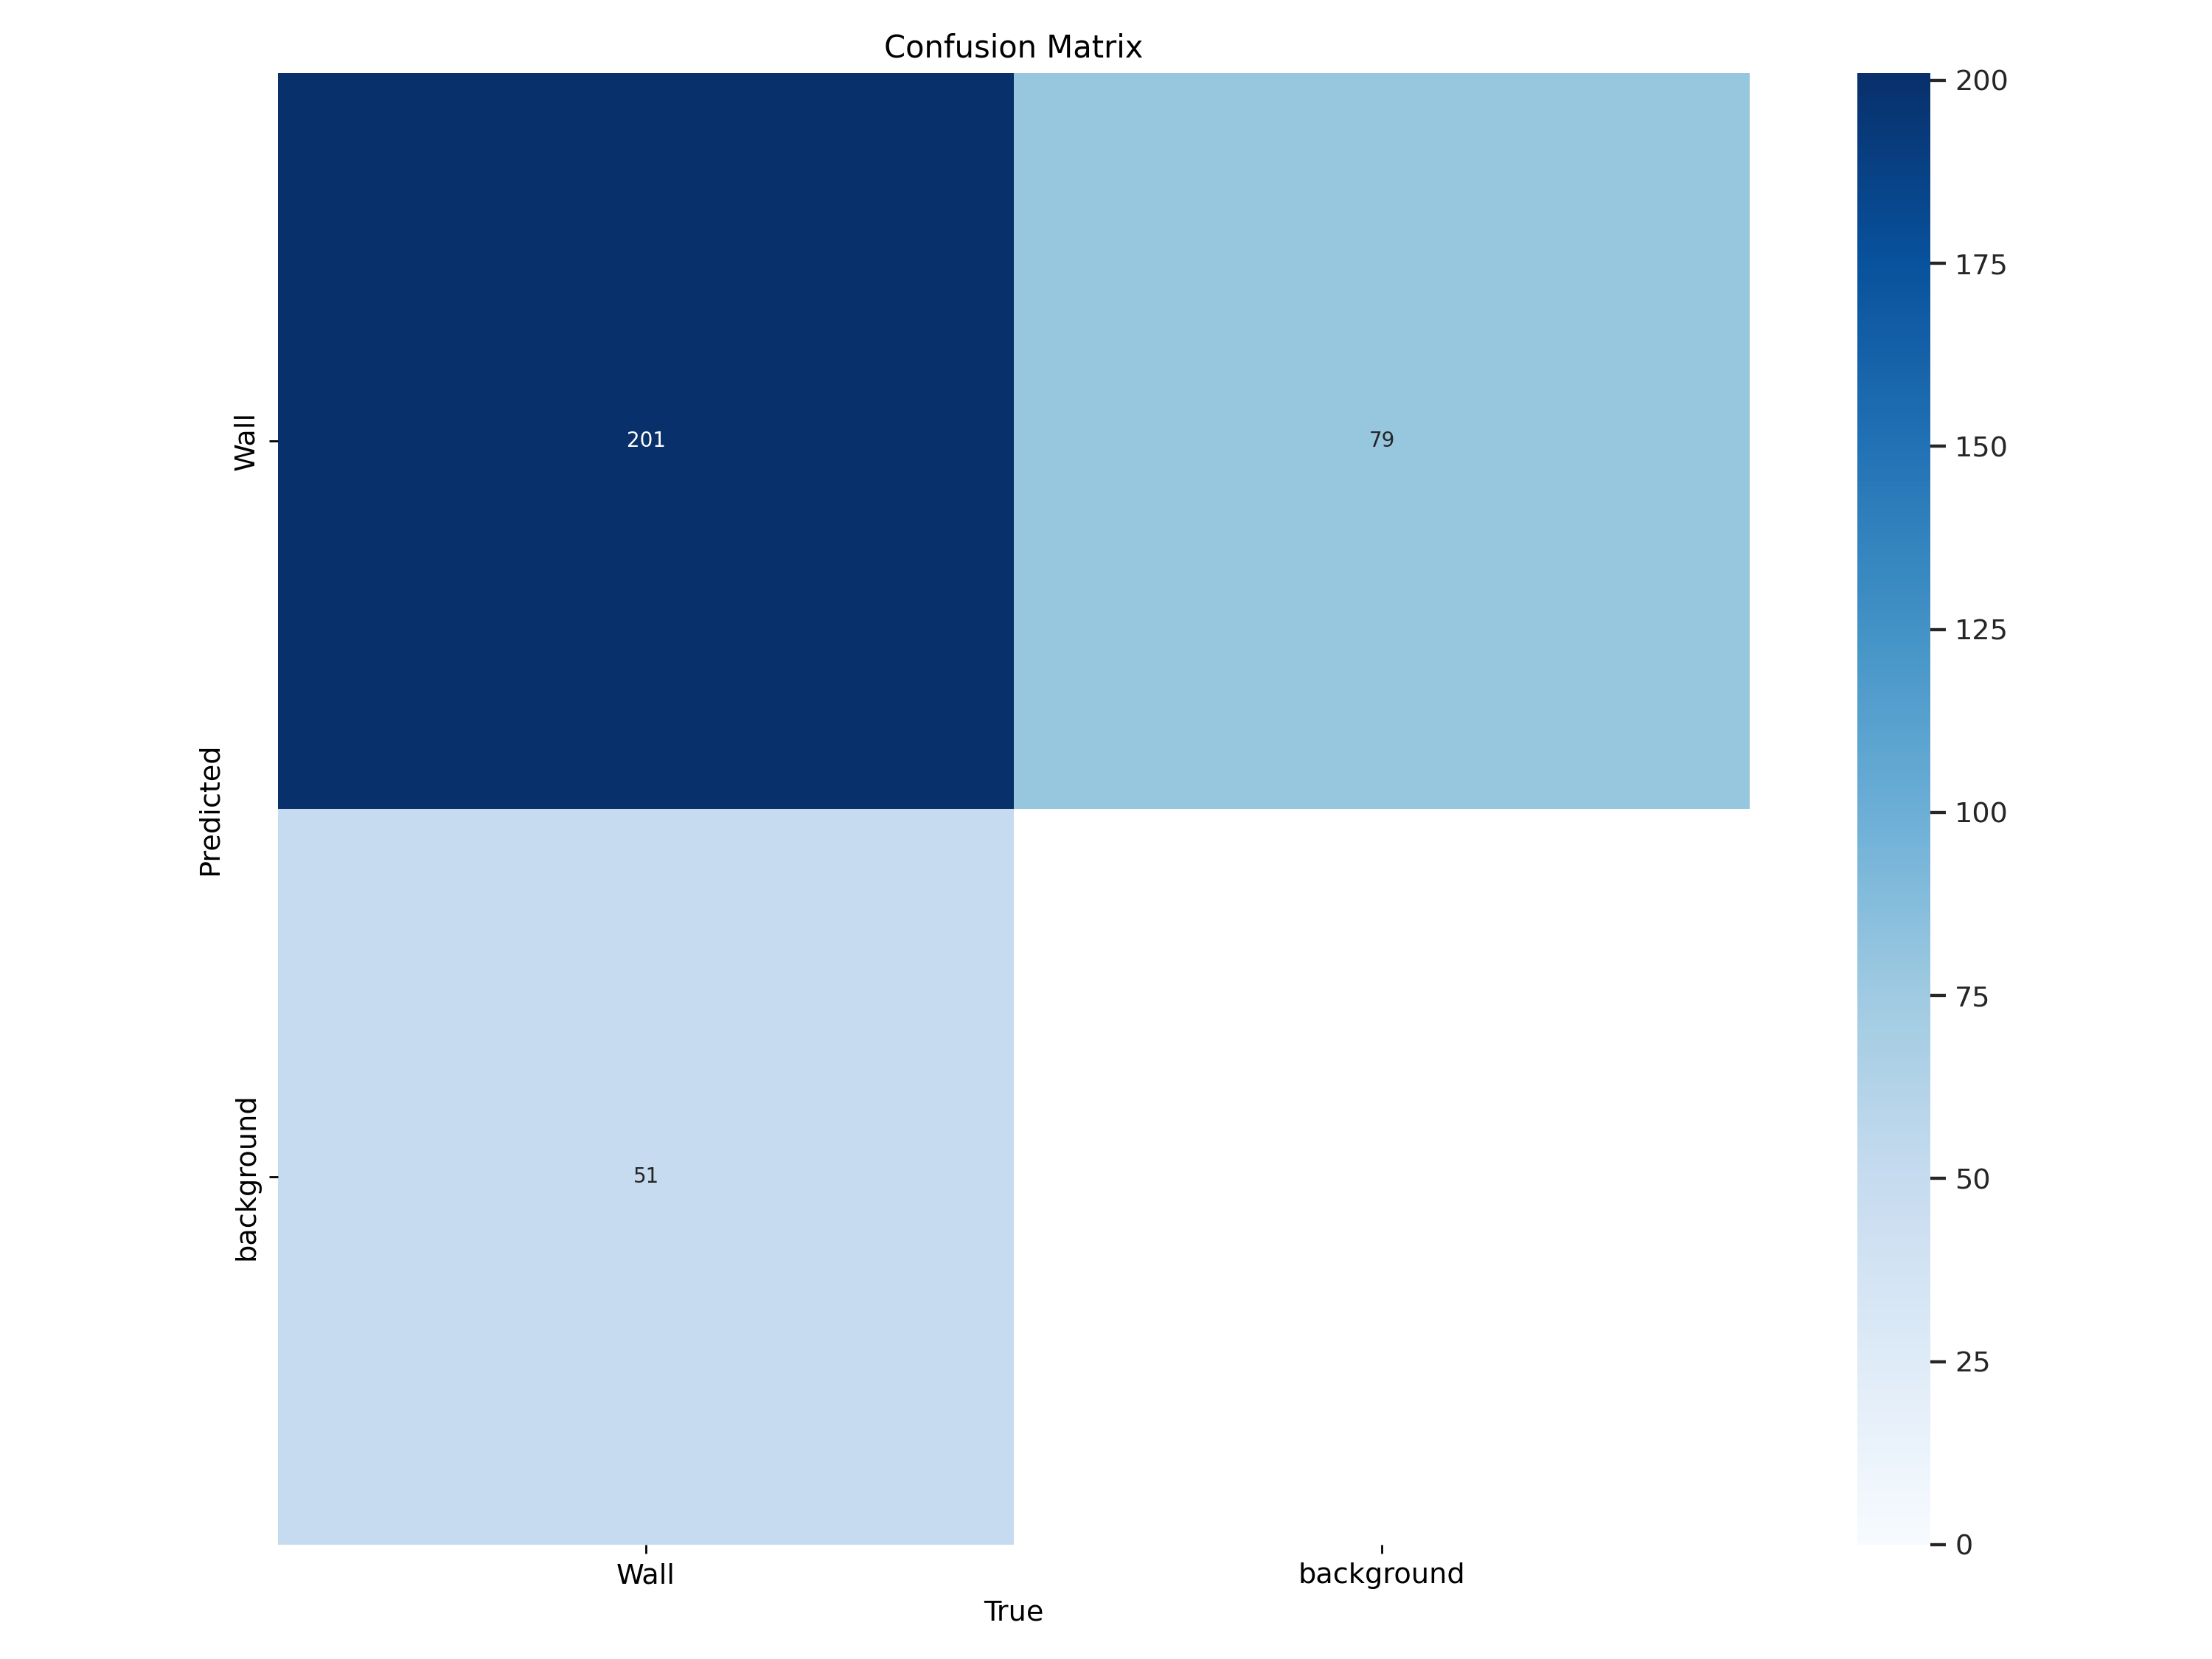

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


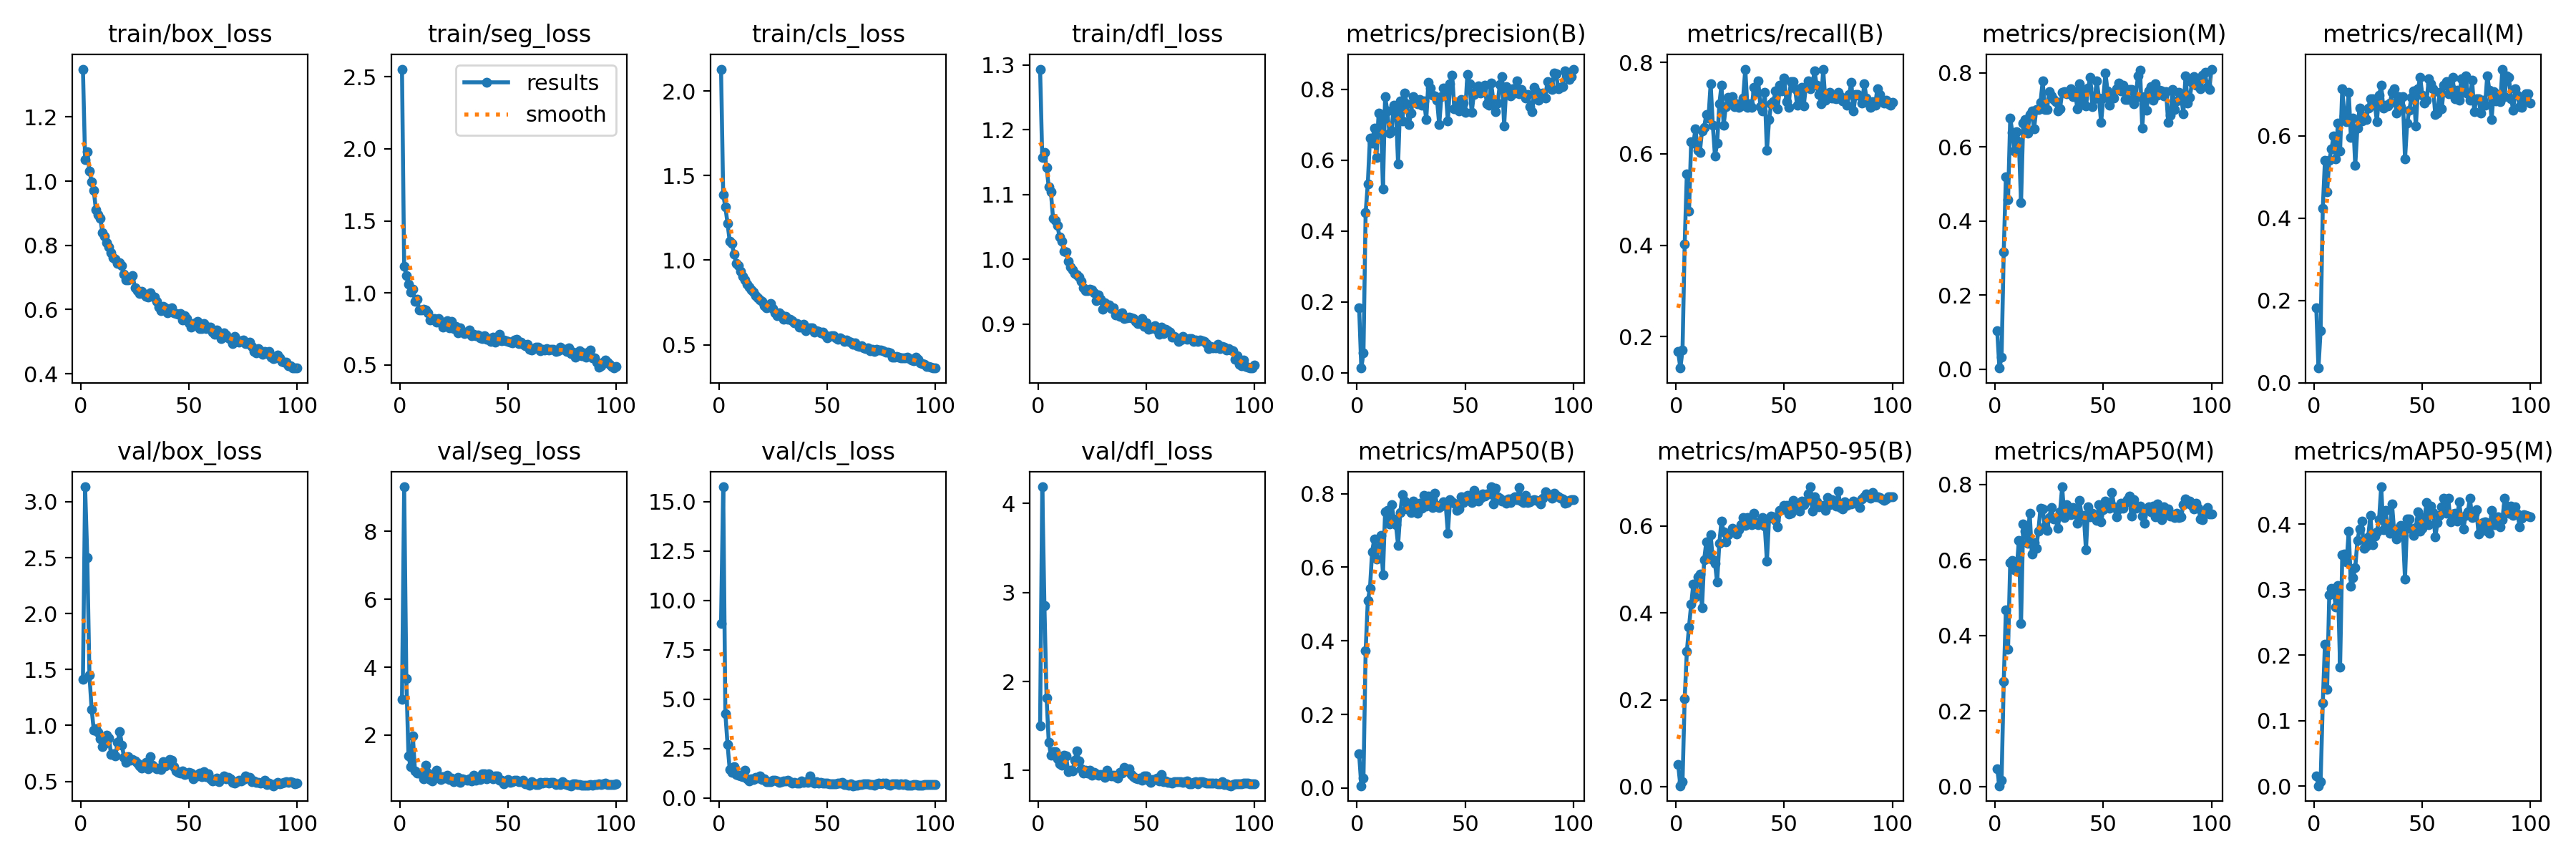

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


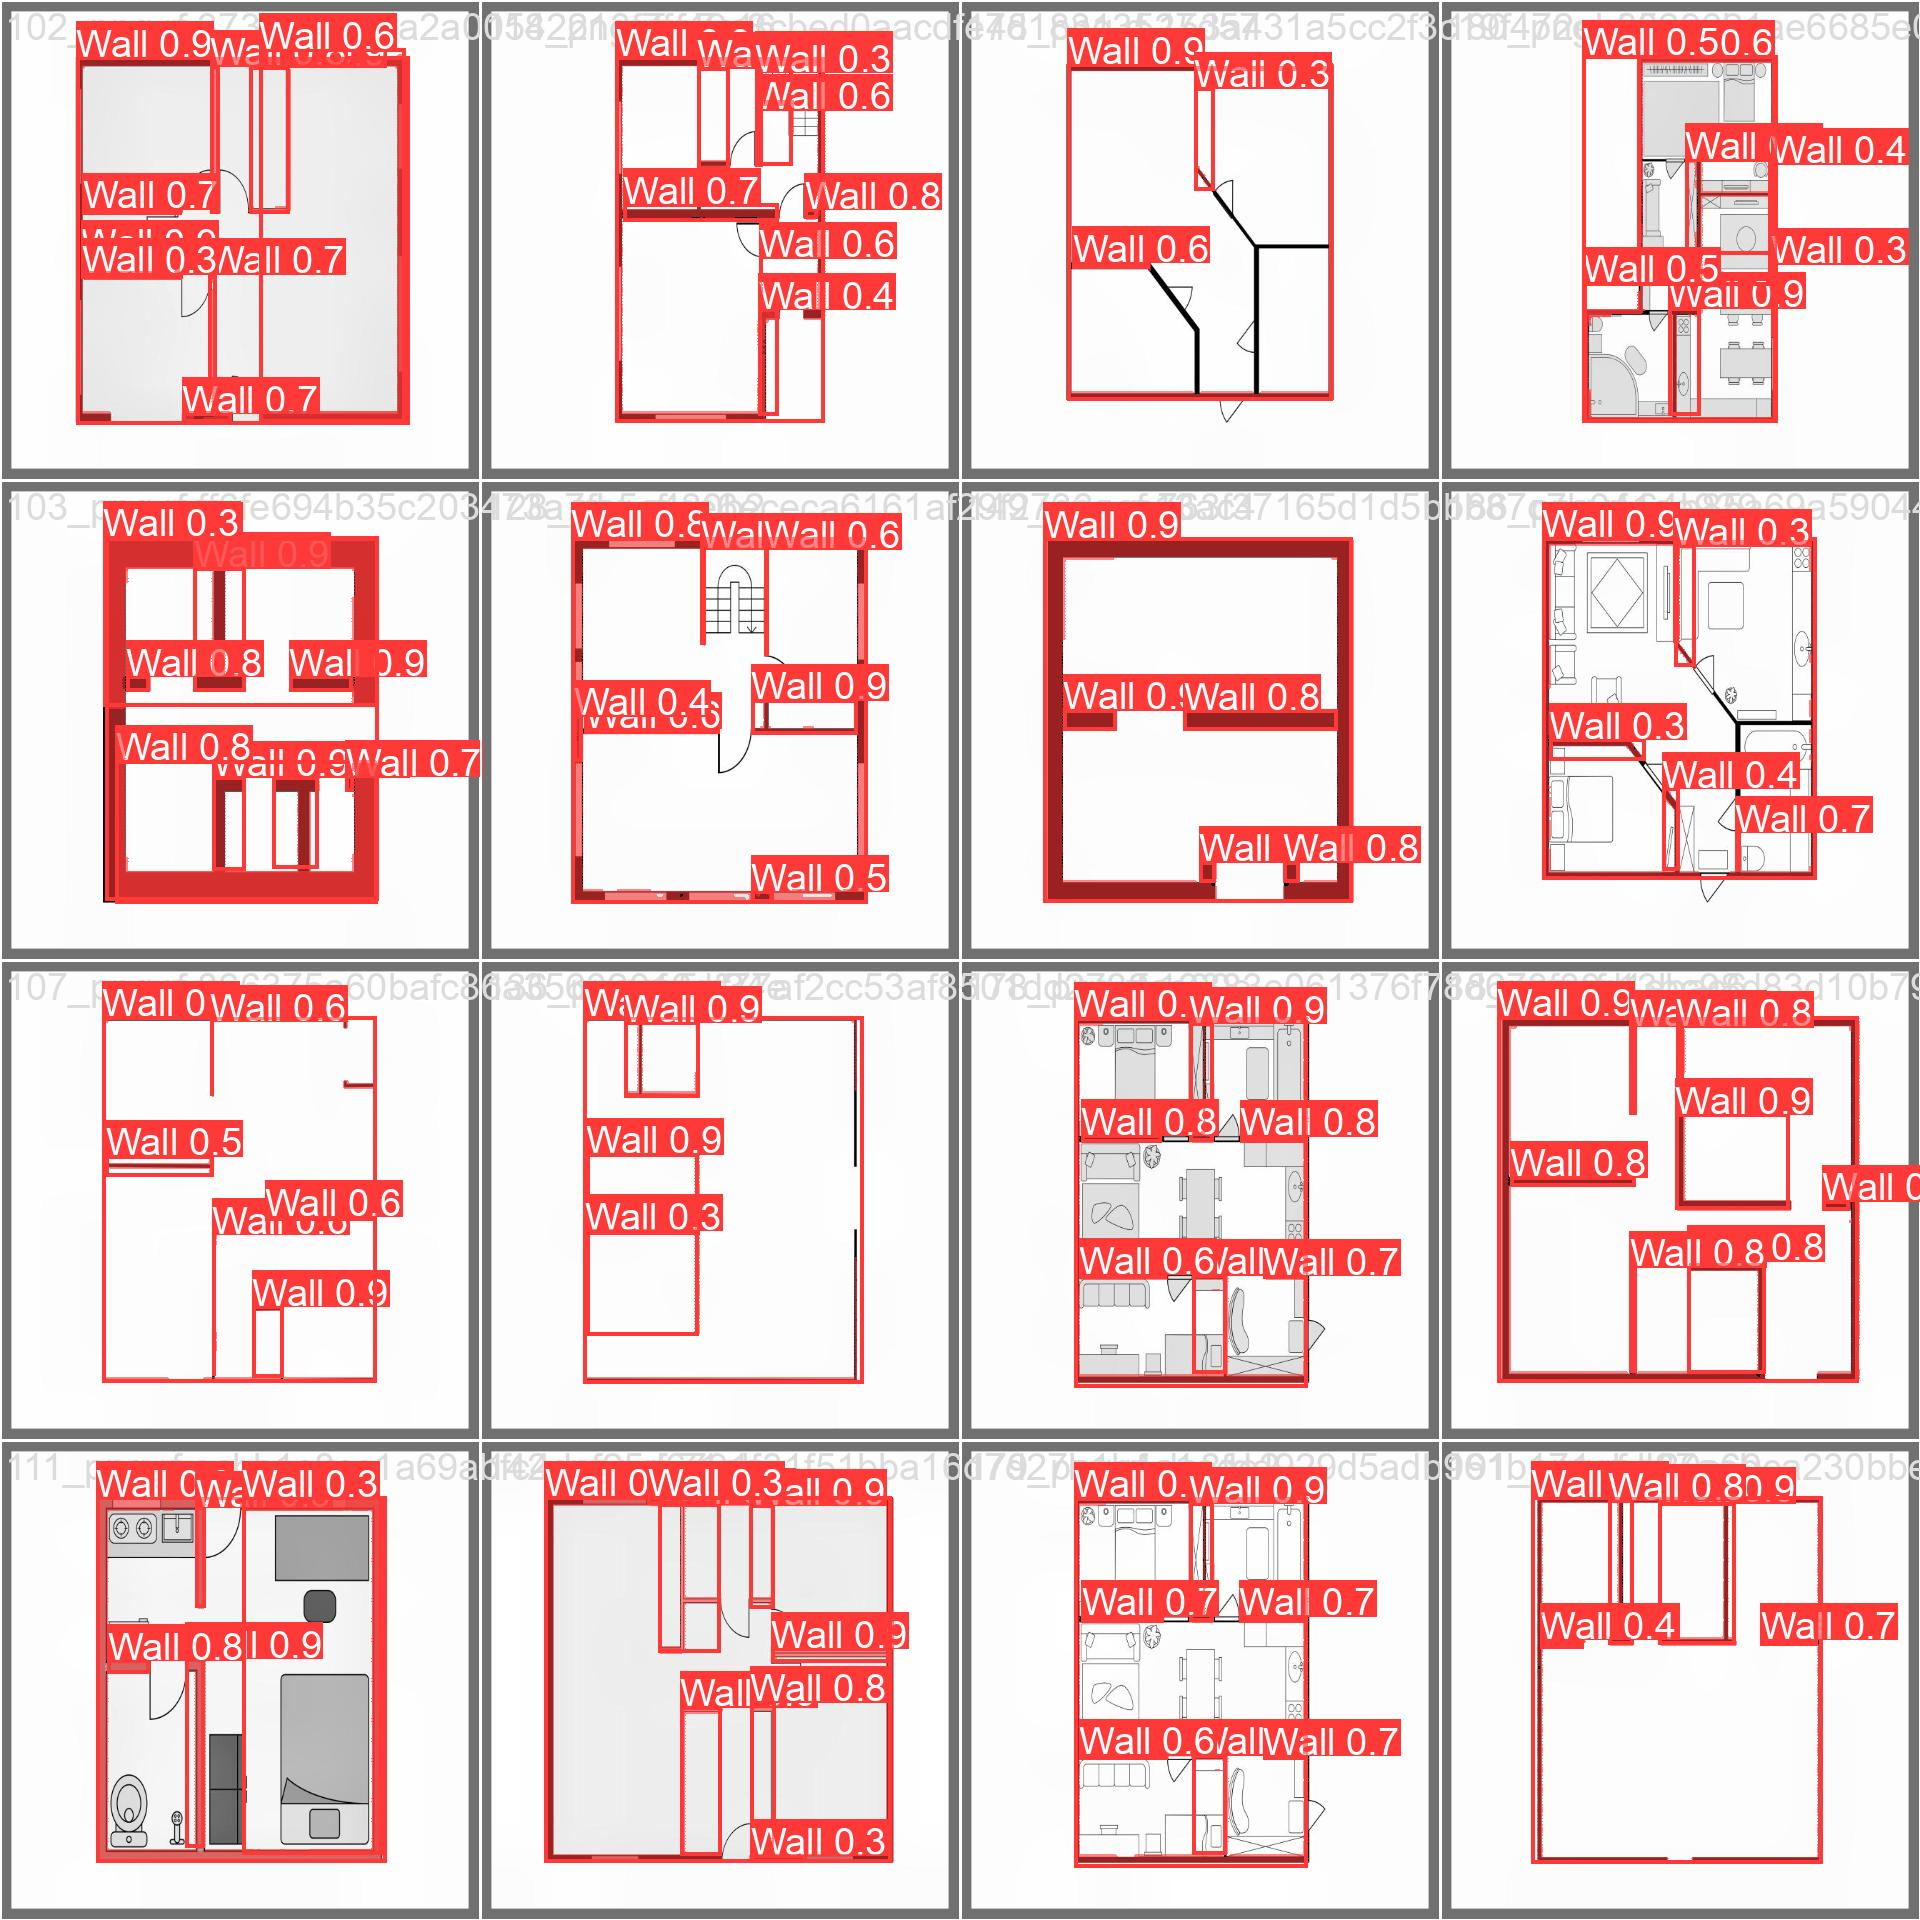

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

In [19]:
!yolo task=segment mode=val model=/content/runs/segment/train/weights/best.pt data="/content/datasets/Walls-Segmentation-(Detection)-8/data.yaml"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/Walls-Segmentation-(Detection)-8/valid/labels.cache... 36 images, 0 backgrounds, 0 corrupt: 100% 36/36 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:04<00:00,  1.43s/it]
                   all         36        252      0.825      0.742       0.82      0.688       0.76      0.706       0.77      0.428
Speed: 5.6ms preprocess, 41.0ms inference, 0.2ms loss, 22.9ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [20]:
project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train/")

View the status of your deployment at: https://app.roboflow.com/ai-flooring-model-mid/walls-segmentation-detection/8
